In [1]:
#################################### Loading model #####################################
from SCALO_Utils import *
filname = 'Detection_final1.h5'
model = load_SCALODEEP_Model(filname)

Using TensorFlow backend.


In [2]:
#################################### Loading Data #####################################
from obspy import read
# The data should be at least 30s (3000 samples of 100 sampling rate),
# and the lenght of the data is multiples of 3000.


Data = 'Test40Hz.mseed'
st = read(Data, debug_headers=True)
data_E,data_N, data_Z = Return_Data(st)

In [13]:
#################################### SCALODEEP #####################################
# laball      --- The output label
# eventime    --- Starting Time of the detected event.
# ReturnLabel --- If you want label set to True
thre = 0.3
laball,eventime = SCALO_Continous_Windows_Overlapping_EvenTime(st,data_E,data_N,data_Z,model,thre,ReturnLabel=True)


0/12
1/12
2/12
3/12
4/12
5/12
6/12
7/12
8/12
9/12
10/12
11/12


In [19]:
# Writing the start time of the detected events
file1 = open('SCALODEEP_DETECTED.txt','w')
file1.writelines('The Starting Times of the Deteted Events: \n\n')
iv = 0
for i in eventime:
    file1.writelines('Evnet_' + str(iv) + '---' + str(i) + '\n')
    iv = iv +1
file1.close()

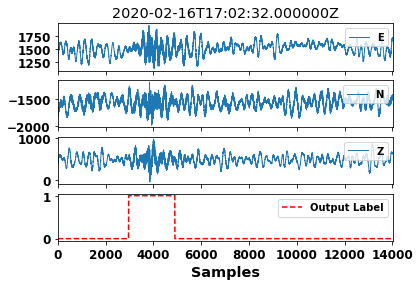

In [8]:
#################################### Visualization #####################################

import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)


# Reconstruct the label for all the data.
vv=0
label = np.zeros_like(data_Z)
for ix in range(0,len(laball)):
    label[ix*3000:ix*3000 +3000]= laball[vv]
    vv = vv+1
    
fig = plt.figure()
ax1 = plt.subplot(411)
plt.plot(data_E,label = 'E' , linewidth = 1, markersize=1)
ax1.legend(loc='upper right', fontsize = 10)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_xlim(xmin=0)
ax1.set_xlim(xmax=len(label))
plt.title(str(st[0].stats.starttime))

ax2 = plt.subplot(412, sharex=ax1)
plt.plot(data_N, label = 'N' , linewidth = 1, markersize=1)
ax2.legend(loc='upper right', fontsize = 10)
ax2.set_xlim(xmin=0)
ax2.set_xlim(xmax=len(label))

plt.setp(ax2.get_xticklabels(), visible=False)

# share x only
ax3 = plt.subplot(413, sharex=ax1)
plt.plot(data_Z, label = 'Z' , linewidth = 1, markersize=1)
ax3.legend(loc='upper right', fontsize = 10)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_xlim(xmin=0)
ax3.set_xlim(xmax=len(label))


# share x only
ax4 = plt.subplot(414, sharex=ax1)
    #plt.plot(lab,'b--',label = 'Ground Truth')
plt.plot(label,'r--',label = 'Output Label')
#plt.xlim(0.01, 5.0)
ax4.legend(loc='best', fontsize = 10)
ax4.set_xlim(xmin=0)
ax4.set_xlim(xmax=len(label))

ax4.set_xlabel("Samples",fontsize='large', fontweight='bold')
plt.show()